# Influence of financial development on the broad money vs inflation correlation


In [15]:
import pandas as pd
import numpy as np

## Country / Country Code


In [16]:
country_metadata = pd.read_csv("country_code.csv",sep = ';')
country_code = country_metadata[['ISO Code','Country']].drop_duplicates()

# Creates dictionnairys that links countries and countries` codes
country_dict = country_code.set_index('ISO Code').to_dict()['Country']
code_dict = country_code.set_index('Country').to_dict()['ISO Code']

In [17]:
country_dict['BRA']

'Brazil'

In [18]:
code_dict['Brazil']

'BRA'

## Market Capitalization 
World Federation of Exchanges

In [19]:
market_cap = pd.read_csv("market_cap.csv",sep = ';') 
# Sum all exchanges markets from the same country
countries_cap = market_cap[['Country']+[str(year) for year in range(2000,2021)]].groupby("Country").sum()
# Get Country Code
countries_cap['code'] = countries_cap.index.to_series().map(code_dict)
print('Countries without IMF Data: ',countries_cap[countries_cap['code'].isna()].index.values) # Countries without IMF Data
#countries_cap = pd.merge(countries_cap, country_code, how='outer', left_on = 'Country', right_on='country').iloc[:100]
flag = (countries_cap['code'].isna() == False) # Countries with IMF Data
# Exclude countries without IMF Data
countries_cap = countries_cap[flag].set_index('code').T
countries_cap.index = pd.to_datetime(countries_cap.index, format='%Y')

Countries without IMF Data:  ['Bermuda' 'Cayman Island' 'Europe' 'Palestine']


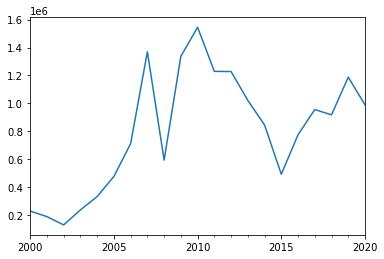

In [20]:
countries_cap.BRA.plot()

## Financial Development Index
International Monetary Fund


In [21]:
fd_index = pd.read_csv("FD_IMF.csv",sep = ';') 

In [22]:
fd_index = fd_index[fd_index['year'] >= 2000].groupby('code').mean().drop(['ifs','year'],axis=1).T

In [23]:
fd_index

code,ABW,AGO,ALB,AM,ARE,ARG,ARM,ATG,AUS,AUT,...,UZB,VCT,VEN,VNM,VUT,WSM,Western Hemisphere,YEM,ZAF,ZMB
FD,0.284211,0.135263,0.174737,0.640526,0.426316,0.307895,0.173684,0.297895,0.902632,0.657895,...,0.176842,0.206842,0.205789,0.383158,0.165263,0.177895,0.297368,0.120000,0.555263,0.107368
FI,0.552632,0.225263,0.335789,0.716316,0.370526,0.330526,0.322632,0.586316,0.925263,0.723684,...,0.321579,0.405789,0.332632,0.340000,0.324737,0.348947,0.437368,0.221053,0.656842,0.183684
FM,0.003684,0.041053,0.002632,0.540000,0.464211,0.272632,0.018947,0.000000,0.844737,0.566316,...,0.024737,0.000000,0.071053,0.412105,0.000000,0.000000,0.147895,0.015789,0.434211,0.025789
FID,0.236316,0.057895,0.085789,0.605263,0.165263,0.172632,0.055789,0.340526,0.922632,0.631579,...,0.010000,0.276316,0.113684,0.217368,0.103158,0.072632,0.282632,0.021053,0.813158,0.079474
FIA,0.726316,0.107895,0.303684,0.670526,0.352632,0.251579,0.341053,0.674211,0.841053,0.649474,...,0.471579,0.333684,0.323684,0.091053,0.324737,0.360526,0.394737,0.034737,0.303158,0.068947
FIE,0.578947,0.550526,0.631053,0.714211,0.573684,0.562632,0.568947,0.630526,0.768421,0.738421,...,0.446316,0.565789,0.554737,0.754737,0.530526,0.608947,0.580000,0.696842,0.738421,0.435789
FMD,0.009474,0.104211,0.012105,0.558947,0.425789,0.104211,0.016316,0.000000,0.903158,0.440526,...,0.044211,0.000000,0.141579,0.157895,0.000000,0.000000,0.160526,0.041053,0.652632,0.061579
FMA,0.000000,0.008947,0.000000,0.523684,0.631579,0.635789,0.038947,0.000000,0.780526,0.836316,...,0.028947,0.000000,0.006842,0.384737,0.000000,0.000000,0.168421,0.000000,0.267368,0.000000
FME,0.000000,0.000000,0.000000,0.524737,0.331053,0.096316,0.000000,0.000000,0.822105,0.424737,...,0.000000,0.000000,0.055263,0.730526,0.000000,0.000000,0.104737,0.000000,0.334737,0.008421


## Inflation
International Monetary Fund

In [24]:
price_index = pd.read_csv("price_index_IMF.csv",sep = ';') 

In [25]:
price_index = price_index[price_index['Attribute'] == 'Value'][['Country Name']+[str(year) for year in range(2000,2021)]]
price_index = price_index.set_index('Country Name')
price_index['code'] = price_index.index.to_series().map(code_dict)
print('Countries without IMF Data: ',price_index[price_index['code'].isna()].index.values) # Countries without IMF Data
flag = (price_index['code'].isna() == False) # Countries with IMF Data
# Exclude countries without IMF Data
price_index = price_index[flag].set_index('code')
price_index = price_index.astype(float).T
price_index.index = pd.to_datetime(price_index.index, format='%Y')
price_index = price_index.dropna(how='any',axis=1)

Countries without IMF Data:  ['Tanzania; United Rep. of' 'Cayman Islands' 'Croatia; Rep. of'
 'Mauritania; Islamic Rep. of' "Côte d'Ivoire" 'West Bank and Gaza'
 'Slovenia; Rep. of' 'China; P.R.: Mainland' 'Comoros; Union of the'
 'China; P.R.: Hong Kong' 'Afghanistan; Islamic Rep. of' 'Gambia; The'
 'Czech Rep.' 'Mozambique; Rep. of' 'Bahamas; The' 'Estonia; Rep. of'
 'Bahrain; Kingdom of' 'Lesotho; Kingdom of' 'Korea; Rep. of'
 'Netherlands; The' 'Fiji; Rep. of' 'Slovak Rep.' 'Dominican Rep.'
 'Belarus; Rep. of' 'China; P.R.: Macao'
 'Ethiopia; The Federal Dem. Rep. of' 'Montserrat' 'Armenia; Rep. of'
 'British Virgin Islands' 'Egypt; Arab Rep. of'
 'Equatorial Guinea; Rep. of' 'Azerbaijan; Rep. of' 'Palau; Rep. of'
 'South Sudan; Rep. of' 'Kazakhstan; Rep. of' 'Eswatini; Kingdom of'
 'North Macedonia; Republic of' 'Serbia; Rep. of' 'Anguilla'
 'Aruba; Kingdom of the Netherlands' 'São Tomé and Príncipe; Dem. Rep. of'
 'Iran; Islamic Rep. of' 'Madagascar; Rep. of' 'San Marino; Rep. of

In [26]:
price_index.head()

code,NOR,BRA,CHE,RUS,LTU,LVA,FRA,CAN,TUR,FIN,...,BEL,ISR,ZAF,ESP,MUS,PRT,CRI,SEN,TTO,ROM
2000-01-01,75.450000,1636.098333,94.035275,30.759554,69.133150,55.021531,79.929167,95.375000,36.741170,79.125435,...,75.630000,75.333333,42.183710,71.428400,45.391598,73.720167,30.602750,77.539894,38.695247,28.004167
2001-01-01,77.716667,1748.013333,94.965300,37.365786,70.078283,56.389938,81.235833,97.783333,56.728436,81.165638,...,77.497500,76.200000,44.588985,73.992562,47.837907,76.941667,34.047333,79.846319,40.837669,37.659167
2002-01-01,78.716667,1895.723333,95.575650,43.265369,70.275558,57.483269,82.798333,99.991667,82.235878,82.440928,...,78.772500,80.575000,48.822578,76.261000,50.908782,79.711833,37.168250,81.712568,42.532456,46.147500
2003-01-01,80.675000,2174.677500,96.185708,49.176843,69.478417,59.174799,84.535833,102.750000,100.000833,83.164298,...,80.024167,81.158333,51.595417,78.578750,52.904943,82.277750,40.680000,81.670080,44.153413,53.195833
2004-01-01,81.041667,2318.145000,96.957967,54.531521,70.287217,62.839131,86.346667,104.658333,108.599167,83.319916,...,81.702500,80.825000,51.238361,80.966917,55.396962,84.223917,45.689667,82.090503,45.796605,59.512500


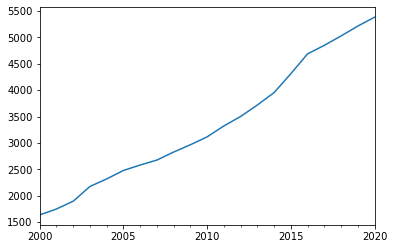

In [27]:
price_index.BRA.plot()

In [28]:
inflation = (price_index - price_index.shift(1))/price_index.shift(1)
inflation.head()

code,NOR,BRA,CHE,RUS,LTU,LVA,FRA,CAN,TUR,FIN,...,BEL,ISR,ZAF,ESP,MUS,PRT,CRI,SEN,TTO,ROM
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-01,0.030042,0.068404,0.009890,0.214770,0.013671,0.024870,0.016348,0.025251,0.544002,0.025784,...,0.024693,0.011504,0.057019,0.035898,0.053893,0.043699,0.112558,0.029745,0.055367,0.344770
2002-01-01,0.012867,0.084502,0.006427,0.157887,0.002815,0.019389,0.019234,0.022584,0.449641,0.015712,...,0.016452,0.057415,0.094947,0.030658,0.064193,0.036003,0.091664,0.023373,0.041501,0.225399
2003-01-01,0.024878,0.147149,0.006383,0.136633,-0.011343,0.029426,0.020985,0.027586,0.216024,0.008774,...,0.015890,0.007240,0.056794,0.030392,0.039211,0.032190,0.094483,-0.000520,0.038111,0.152735
2004-01-01,0.004545,0.065972,0.008029,0.108886,0.011641,0.061924,0.021421,0.018573,0.085983,0.001871,...,0.020973,-0.004107,-0.006920,0.030392,0.047104,0.023654,0.123148,0.005148,0.037215,0.118744


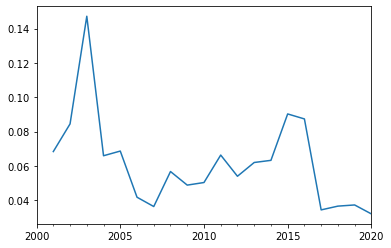

In [29]:
inflation.BRA.plot()

## Monetary Aggregates
OCDE (M1 & M3) + World Bank (M3)

In [30]:
M1_ocde_raw = pd.read_csv("M1_OCDE.csv",sep = ';')
M3_ocde_raw = pd.read_csv("M3_OCDE.csv",sep = ';')

M1_ocde_dict = {country:{year:np.nan for year in range(2000,2020)} for country in M1_ocde_raw.LOCATION.unique()}
M3_ocde_dict = {country:{year:np.nan for year in range(2000,2020)} for country in M3_ocde_raw.LOCATION.unique()}

for index, row in M1_ocde_raw.iterrows():
    M1_ocde_dict[row['LOCATION']][row['TIME']] = row['Value']

for index, row in M3_ocde_raw.iterrows():
    M3_ocde_dict[row['LOCATION']][row['TIME']] = row['Value']


M1_ocde = pd.DataFrame.from_dict(M1_ocde_dict)
M1_ocde.index = pd.to_datetime(M1_ocde.index, format='%Y')
M3_ocde = pd.DataFrame.from_dict(M3_ocde_dict)
M3_ocde.index = pd.to_datetime(M1_ocde.index, format='%Y')

In [31]:
M1_ocde.head()

,AUS,CAN,CZE,DNK,HUN,ISL,JPN,KOR,MEX,NZL,...,COL,CRI,IND,IDN,ISR,RUS,ZAF,OECD,OECDE,EA19
2000-01-01,18.76786,29.28147,20.24264,38.01241,20.53272,16.33402,46.71507,28.33863,15.96037,34.98002,...,13.94206,NaN,14.89199,13.25959,9.747102,4.556386,19.85736,28.53280,16.89676,31.76884
2001-01-01,21.59654,32.19206,22.77059,39.04982,23.18316,16.42490,50.69358,33.51904,18.31561,40.14391,...,15.70789,NaN,16.55491,15.97713,11.093320,6.924253,21.76143,31.07184,19.86309,34.03704
2002-01-01,28.34892,35.36032,26.15493,41.73394,27.43054,17.90695,64.63502,41.46779,21.76995,45.63920,...,18.86261,14.37509,18.46166,17.55188,12.872630,9.329021,25.93628,35.05837,22.72057,36.66444
2003-01-01,32.18549,36.72045,30.58028,45.07611,31.98979,21.87142,69.84149,44.16972,24.35896,49.60818,...,21.88685,17.35774,21.01543,19.68133,12.918790,13.088390,26.47052,38.24948,26.31899,40.59911
2004-01-01,34.84903,39.72519,34.36931,48.98291,33.85900,28.61759,72.74577,47.66790,27.76016,53.77688,...,25.16684,22.59781,24.76314,22.44134,15.184700,18.654890,30.54467,41.53373,30.84160,44.41516


In [32]:
M1_ocde.columns

Index(['AUS', 'CAN', 'CZE', 'DNK', 'HUN', 'ISL', 'JPN', 'KOR', 'MEX', 'NZL',
       'NOR', 'POL', 'SWE', 'CHE', 'TUR', 'GBR', 'USA', 'BRA', 'CHL', 'CHN',
       'COL', 'CRI', 'IND', 'IDN', 'ISR', 'RUS', 'ZAF', 'OECD', 'OECDE',
       'EA19'],
      dtype='object')

In [33]:

for country in M1_ocde.columns:
    M1_ocde[country] = ((M1_ocde[country] - M1_ocde[country].shift(1))/M1_ocde[country])
M1_ocde = M1_ocde.iloc[1:] # Exclude first row

for country in M3_ocde.columns:
    M3_ocde[country] = ((M3_ocde[country] - M3_ocde[country].shift(1))/M3_ocde[country]) 
M3_ocde = M3_ocde.iloc[1:] # Exclude first row

In [34]:
M1_ocde.head()

,AUS,CAN,CZE,DNK,HUN,ISL,JPN,KOR,MEX,NZL,...,COL,CRI,IND,IDN,ISR,RUS,ZAF,OECD,OECDE,EA19
2001-01-01,0.130978,0.090413,0.111018,0.026566,0.114326,0.005533,0.078482,0.154551,0.128592,0.128634,...,0.112417,NaN,0.100449,0.170089,0.121354,0.341967,0.087497,0.081715,0.149339,0.066639
2002-01-01,0.238188,0.089599,0.129396,0.064315,0.154841,0.082764,0.215695,0.191685,0.158675,0.120407,...,0.167247,NaN,0.103282,0.089720,0.138224,0.257773,0.160966,0.113711,0.125766,0.071661
2003-01-01,0.119202,0.037040,0.144713,0.074145,0.142522,0.181263,0.074547,0.061172,0.106286,0.080007,...,0.138176,0.171834,0.121519,0.108196,0.003573,0.287229,0.020182,0.083429,0.136723,0.096915
2004-01-01,0.076431,0.075638,0.110245,0.079758,0.055206,0.235735,0.039924,0.073386,0.122521,0.077518,...,0.130330,0.231884,0.151342,0.122988,0.149223,0.298394,0.133383,0.079074,0.146640,0.085918
2005-01-01,0.085079,0.060055,0.075341,0.149577,0.127108,0.234104,0.044488,0.084674,0.099611,0.050885,...,0.156188,0.199338,0.143880,0.127238,0.146639,0.230183,0.124851,0.059758,0.128051,0.118922


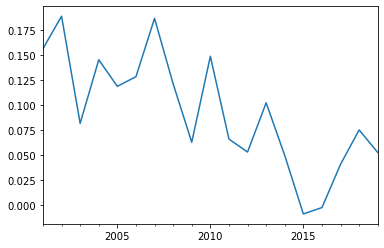

In [35]:
M1_ocde.BRA.plot()

# M1 x Inflation Correlation

## Standardize Time Series Data

In [36]:
from sklearn.preprocessing import StandardScaler

for country in M1_ocde.columns:
    scaler = StandardScaler()

    # prepare data for standardization
    values = M1_ocde[country].values
    values = values.reshape((len(values), 1))

    scaler = scaler.fit(values)
    M1_ocde[country] = scaler.transform(values)

for country in M3_ocde.columns:
    scaler = StandardScaler()
    
    # prepare data for standardization
    values = M3_ocde[country].values
    values = values.reshape((len(values), 1))

    scaler = scaler.fit(values)
    M3_ocde[country] = scaler.transform(values)

for country in inflation.columns:
    scaler = StandardScaler()
    # prepare data for standardization
    values = inflation[country].values
    values = values.reshape((len(values), 1))

    scaler = scaler.fit(values)
    inflation[country] = scaler.transform(values)

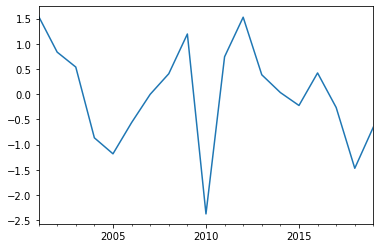

In [37]:
M3_ocde.USA.plot()

## Correlation (Pearson's R)

In [38]:
from scipy.stats import pearsonr

def find_correlation(M1,inflation,s = 1):
    M1_f = M1.first_valid_index()
    M1_l = M1.last_valid_index()
    in_f = inflation.shift(s).first_valid_index()
    in_l = inflation.shift(s).last_valid_index()
    f = max(M1_f,in_f)
    l = min(M1_l,in_l)
    M1 = M1[(M1.index>=f) & (M1.index<=l)]
    infl = inflation.shift(s)[(inflation.index>=f) & (inflation.index<=l)]
    R, alpha = pearsonr(M1.values,infl.values)
    return R, alpha

def plot_country(country,s = 1):
    M1 = M1_ocde[country]
    infl = inflation[country]
    M1_f = M1.first_valid_index()
    M1_l = M1.last_valid_index()
    in_f = infl.shift(s).first_valid_index()
    in_l = infl.shift(s).last_valid_index()
    f = max(M1_f,in_f)
    l = min(M1_l,in_l)
    M1 = M1[(M1.index>=f) & (M1.index<=l)]
    infl = infl.shift(s)[(infl.index>=f) & (infl.index<=l)]
    R, alpha = pearsonr(M1.values,infl.values)
    print('correlation:',R)
    M1.plot()
    infl.plot()



correlation: 0.6560685202924007


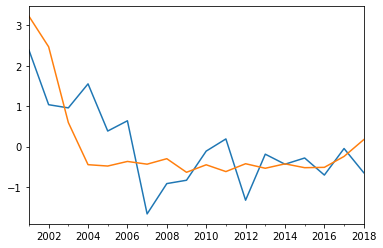

In [39]:
plot_country('TUR',s=0) # Undeveloped countries problem

correlation: -0.13741668800591672


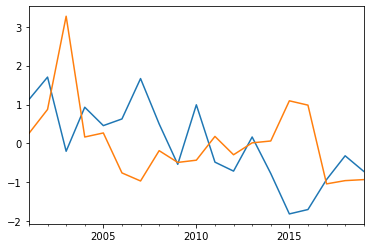

In [40]:
plot_country('BRA',s=0) 

correlation: -0.47061859050186633


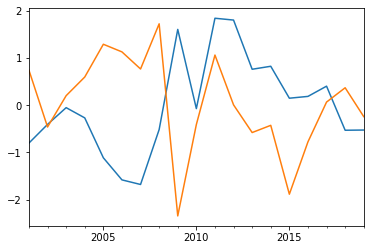

In [41]:
plot_country('USA',s=0) # Delay problem

correlation: -0.49207720668361515


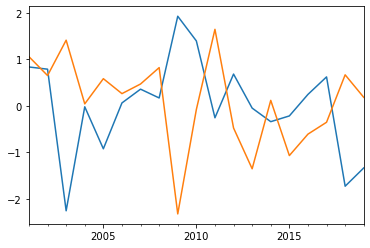

In [42]:
plot_country('CAN',s=0) # Delay problem

In [43]:
correlation = dict()

for country in list(set(M1_ocde.columns) & set(inflation.columns)):

    R, alpha = find_correlation(M1_ocde[country],inflation[country],s=0)
    correlation[country] = {'R':R, 'alpha':alpha}

correlation = pd.DataFrame.from_dict(correlation)

In [44]:
correlation

,CAN,BRA,JPN,NOR,MEX,NZL,IDN,ISL,CRI,HUN,...,RUS,DNK,USA,TUR,SWE,AUS,CHL,GBR,ISR,COL
R,-0.492077,-0.137417,-0.233296,-0.017921,-0.178866,-0.087314,0.281141,0.408356,0.820165,-0.512133,...,0.412233,-0.189666,-0.470619,0.656069,-0.427638,0.058940,-0.243014,-0.238518,-0.120663,-0.015609
alpha,0.032347,0.574802,0.336436,0.943732,0.477614,0.722263,0.258421,0.082609,0.000055,0.024979,...,0.089139,0.436741,0.041993,0.003110,0.076688,0.810579,0.331213,0.325419,0.622681,0.949429


In [45]:
correlation.T.R.mean()

-0.05280206426772278

## FD Index vs Correlation

In [46]:
versus = correlation.append(fd_index)
versus = versus.dropna(axis=1)
versus = versus.T
versus = versus[['FD','R']]

Regression p-value: 0.005090519056691659


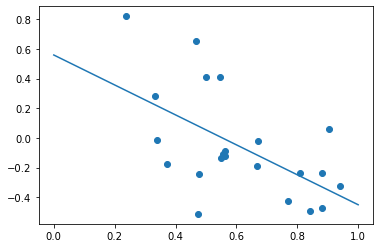

In [47]:
from scipy import stats
import matplotlib.pyplot as plt

slope_x, intercept_x, r_value_x, p_value_x, std_err_x = stats.linregress(versus['FD'],versus['R'])
versus
print('Regression p-value:',p_value_x)

x = np.linspace(0,1)
y = slope_x * x + intercept_x
plt.xlabel = 'FD Index'
plt.ylabel = 'Inflation / M1 Correlation '
plt.plot(x,y)
plt.scatter(x=versus['FD'],y=versus['R'])
